In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

from scipy.integrate import odeint, solve_ivp

# SIR model

SIR - простейшая вычислительная модель для моделирования течения эпидемий. Представляет собой систему обыкновенных дифференциальных уравнений. 
Два основных коэффицента:
1. $\beta$ - коэффициент интенсивности передачи инфекции
2. $\gamma$ - коэффициент интенсивности выздоровления инфицированных

$S$ - количество восприимчивых к инфекции людей

$I$ - инфицированные

$R$ - переболевшие

$$
\frac{dS}{dt} = - \frac{\beta I S}{N}, \\
\frac{dI}{dt} = \frac{\beta I S}{N}- \gamma I, \\
\frac{dR}{dt} = \gamma I
$$

$$S(t) + I(t) + R(t) = N$$

## Решение на SciPy

`odeint` -  системы ODE.     
$$\frac{dy}{dt} = f(t, y) \\
   y(t_0) = y_0
$$   

In [3]:
N = 7_000_000

I0, R0 = 1., 0.

S0 = N - I0 - R0

beta, gamma = 0.5, 0.05 

def f(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * I * S / N
    dIdt = beta * I * S / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

t = np.arange(0., 100., 1.)
y0 = (S0, I0, R0)

solution = odeint(f, y0, t,  args=(N, beta, gamma))
S, I, R = solution.T

# solution = solve_ivp(f, (0., 100.), y0,  t_eval=t, args=(N, beta, gamma))
# S, I, R = solution['y']

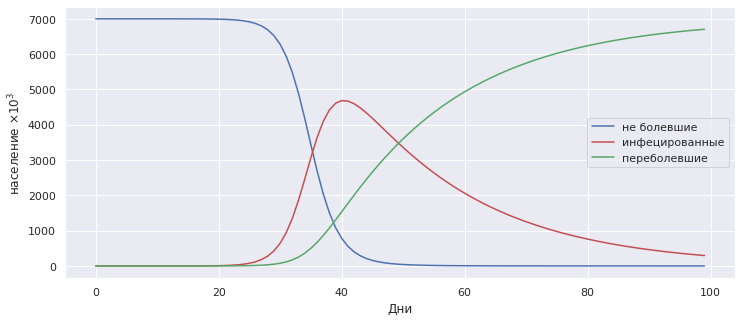

In [4]:

plt.figure( figsize=(12, 5))

plt.plot(t, S/1000, 'b', label='не болевшие')
plt.plot(t, I/1000, 'r', label='инфецированные')
plt.plot(t, R/1000, 'g', label='переболевшие')

plt.xlabel('Дни')
plt.ylabel('население $\\times 10^3$')

plt.legend()
plt.show()

Можно визуализировать с помощью `ipywidgets`

In [6]:
from ipywidgets import interact, interactive, fixed
import ipywidgets


def solve_SIR(N=7_000_000, I0=1, R0=0, beta=0.5, gamma=0.05 ):    
    def f(y, t, N, beta, gamma):
        S, I, R = y
        dSdt = -beta * I * S / N
        dIdt = beta * I * S / N - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt

    t = np.arange(0., 100., 1.)
    y0 = (S0, I0, R0)

    solution = odeint(f, y0, t,  args=(N, beta, gamma))
    return solution.T, t
    

def draw_SIR(beta, gamma, I0):
    (S, I, R), t = solve_SIR(I0=I0, beta=beta, gamma=gamma)
    plt.figure(figsize=(12, 5))

    plt.plot(t, S/1000, 'b', label='не болевшие')
    plt.plot(t, I/1000, 'r', label='инфецированные')
    plt.plot(t, R/1000, 'g', label='переболевшие')

    plt.xlabel('Дни')
    plt.ylabel('население $\\times 10^3$')

    plt.legend()
    plt.show()

interact(draw_SIR, beta=ipywidgets.FloatSlider(min=0,max=1,step=0.1, value=0.5), 
                   gamma=ipywidgets.FloatSlider(min=0,max=0.5,step=0.01, value=0.05), 
                   I0=ipywidgets.IntSlider(min=1,max=20,step=1, value=1))

interactive(children=(FloatSlider(value=0.5, description='beta', max=1.0), FloatSlider(value=0.05, description…

<function __main__.draw_SIR(beta, gamma, I0)>